In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Glue weight distribution

In [4]:
weight = (pd.read_excel('FR165_PR_glue.xlsx', sheet_name='weight')
          .query("weight.between(0.045,0.055)")
          .drop_duplicates(['SerialNumber','tDateTime'])
          )
weight

,SerialNumber,tDateTime,weight,Result
44,TC531003090212,2023-10-19 10:09:16,0.045,1
45,TC5310030900FB,2023-10-19 09:58:03,0.045,1
46,TC53100309014D,2023-10-19 09:57:49,0.045,1
47,TC53100309014B,2023-10-19 09:56:16,0.045,1
48,TC531003090135,2023-10-19 09:53:43,0.045,1
...,...,...,...,...
1057,83091704A0,2023-10-18 11:11:05,0.055,1
1058,83091704A1,2023-10-18 10:18:34,0.055,1
1059,83091704A0,2023-10-18 10:12:17,0.055,1
1060,83091704A1,2023-10-18 10:10:52,0.055,1


In [5]:
overflow = (pd.read_excel('FR165_PR_glue.xlsx', sheet_name='overflow')
            .dropna())
overflow

,SerialNumber,MachineName,StationId,weight
17,83091704A0C2,T5_3SA03PU02,1,0.054
21,83091704A0EP,T5_3SA03PU01,1,0.049
25,83091704A1BX,T5_3SA03PU01,1,0.047
26,83091704A0RJ,T5_3SA03PU01,2,0.052
27,83091704A0R8,T5_3SA03PU01,1,0.051
28,83091704A1VH,T5_3SA03PU01,1,0.051
29,83091704A1GF,T5_3SA03PU01,1,0.051
30,83091704A0VY,T5_3SA03PU02,2,0.049
32,83091704A1BL,T5_3SA03PU02,2,0.053
33,83091704A08P,T5_3SA03PU01,1,0.049


<Axes: title={'center': 'PR GlueWeight'}, xlabel='weight'>

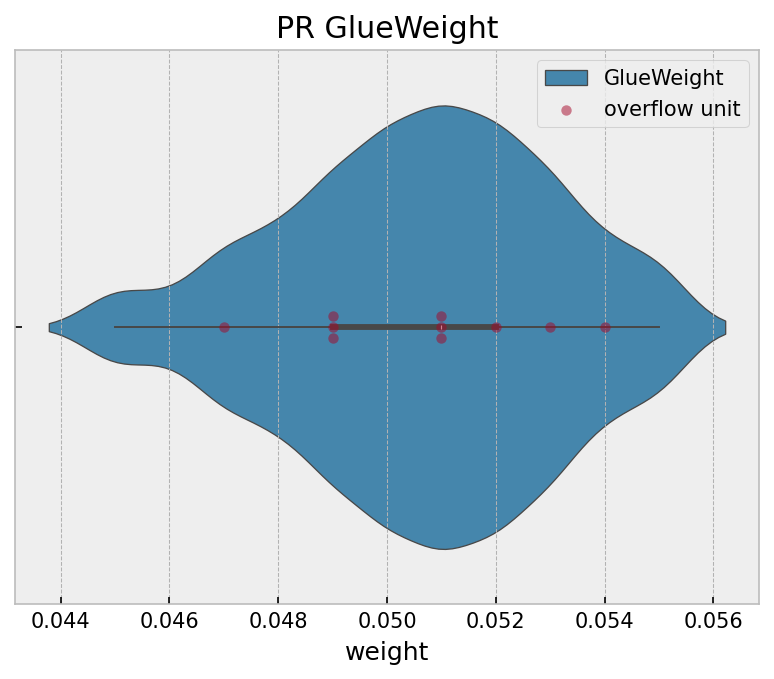

In [6]:
plt.style.use('bmh')
plt.figure(dpi=150)
plt.title('PR GlueWeight')
sns.violinplot(data=weight, x='weight', label='GlueWeight')
sns.swarmplot(data=overflow, x='weight', alpha=0.5, label='overflow unit')

# Overflow rate

In [18]:
overflow2 = (pd.read_excel('FR165_PR_glue.xlsx', sheet_name='overflow')
             .groupby(['MachineName','StationId'])
             .agg(n_overflow = ('SerialNumber','count'))
             )
overflow2

n_overflow
MachineName  StationId            
T5_3SA03PU01 1                  16
             2                   4
T5_3SA03PU02 1                   6
             2                   8

In [85]:
machine = (pd.read_excel('FR165_PR_glue.xlsx', sheet_name='machine')
            .drop_duplicates('SerialNumber')
            .groupby(['MachineName','StationId'])
            .agg(n_units = ('SerialNumber','count'))
            )
machine

n_units
MachineName  StationId         
T5_3SA03PU01 1              205
             2              238
T5_3SA03PU02 1              338
             2              348

In [86]:
overflow_rate = (pd.merge(machine, overflow2, on=['MachineName','StationId'])
                .reset_index()
                .assign(overflow_rate = lambda df : 100*(df.n_overflow / df.n_units).round(3)
                        ,StationId = lambda df : df.StationId.astype('category')
                        )
                )
overflow_rate

,MachineName,StationId,n_units,n_overflow,overflow_rate
0,T5_3SA03PU01,1,205,16,7.8
1,T5_3SA03PU01,2,238,4,1.7
2,T5_3SA03PU02,1,338,6,1.8
3,T5_3SA03PU02,2,348,8,2.3


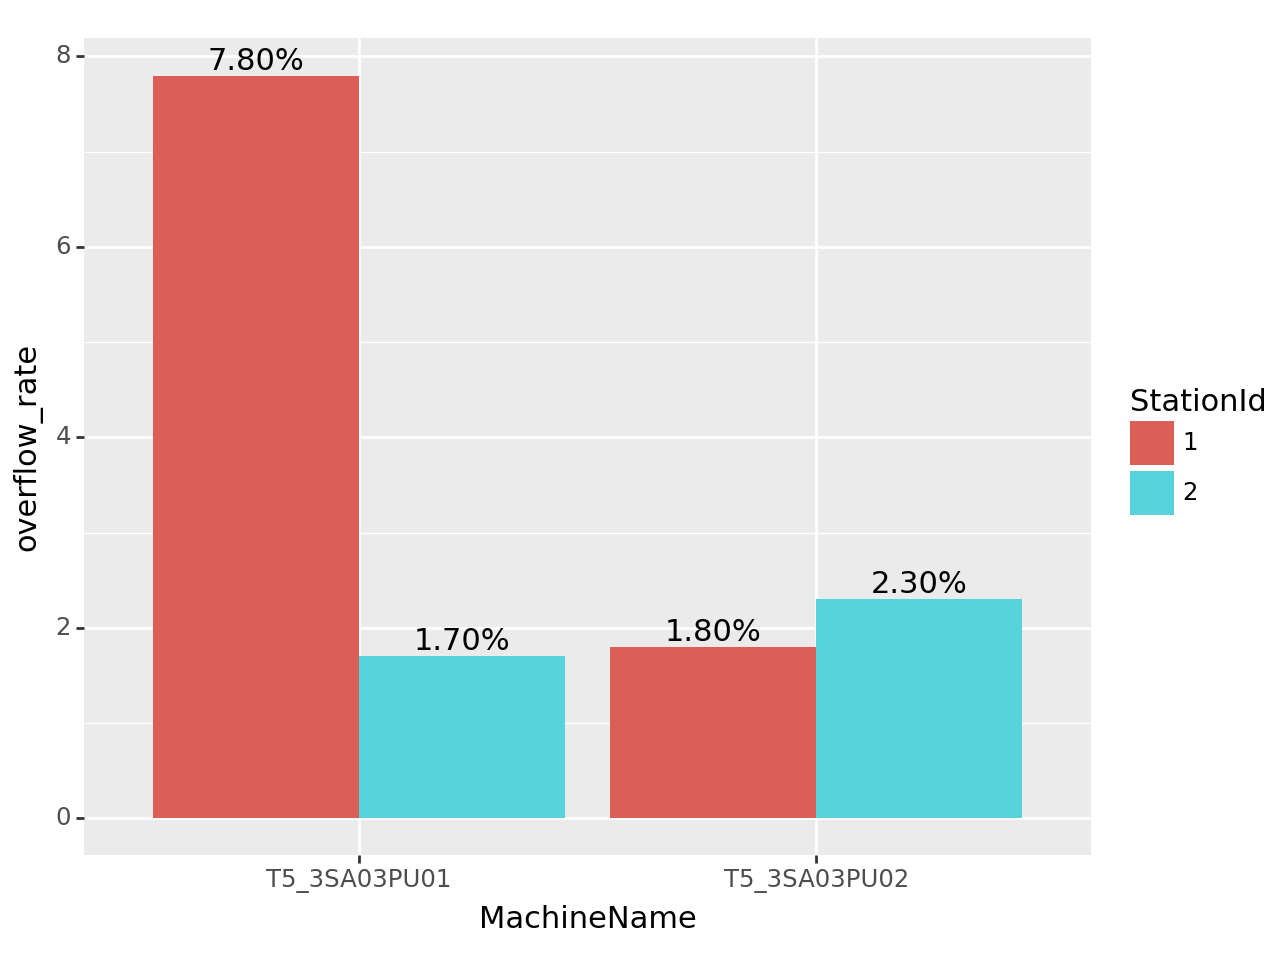

<Figure Size: (640 x 480)>

In [87]:
(
    ggplot(overflow_rate)
    + aes(x='MachineName', y='overflow_rate', fill='StationId')
    + geom_col(stat='identity', position='dodge')
    + geom_text(aes(label='overflow_rate'), position= position_dodge(width=0.9), va='bottom', format_string='{:.2f}%')
)

<Axes: xlabel='MachineName', ylabel='overflow_rate'>

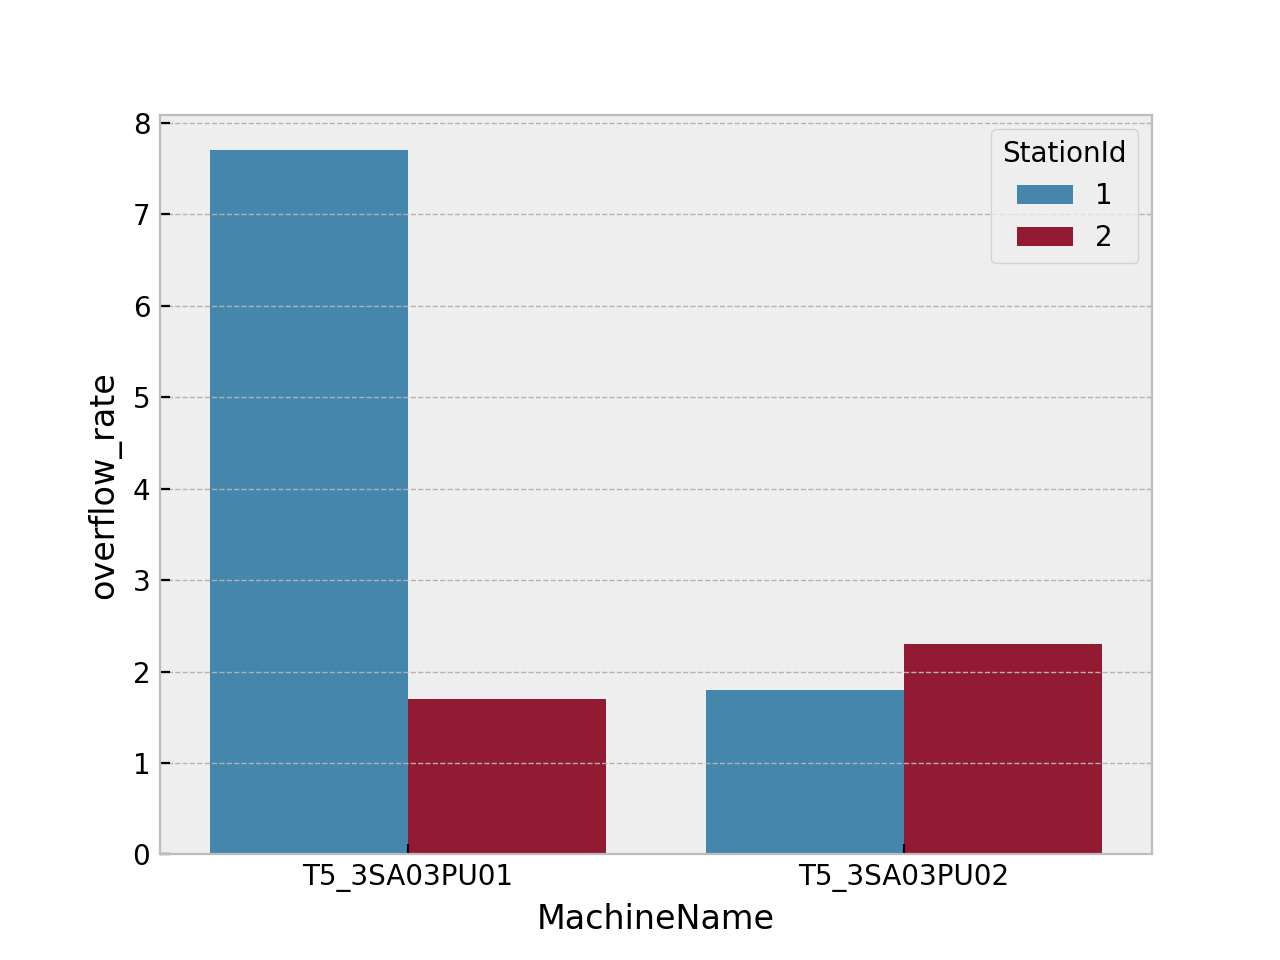

In [66]:
sns.barplot(data=overflow_rate, x='MachineName', y='overflow_rate', hue='StationId')